In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./dataset/DiseaseAndSymptoms.csv')

In [3]:
print("Shape of dataset:", df.shape)

Shape of dataset: (4920, 18)


In [4]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [5]:
print("\nDescriptive Statictics:")
df.describe(include='all')


Descriptive Statictics:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [7]:
df.columns = df.columns.str.lower()

df = df.apply(lambda col: col.str.lower() if col.dtypes == 'object' else col)

if 'disease' in df.columns:
    df['disease'] = df['disease'].str.strip().str.replace(' ', '_')

symptom_columns = [col for col in df.columns if 'symptom_' in col]

def clean_symptom(symptom):
    if isinstance(symptom, str):
        return ''.join(symptom.split())
    return symptom

for col in symptom_columns:
    df[col] = df[col].apply(clean_symptom)

df.head()

,disease,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,symptom_9,symptom_10,symptom_11,symptom_12,symptom_13,symptom_14,symptom_15,symptom_16,symptom_17
0,fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fungal_infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fungal_infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fungal_infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


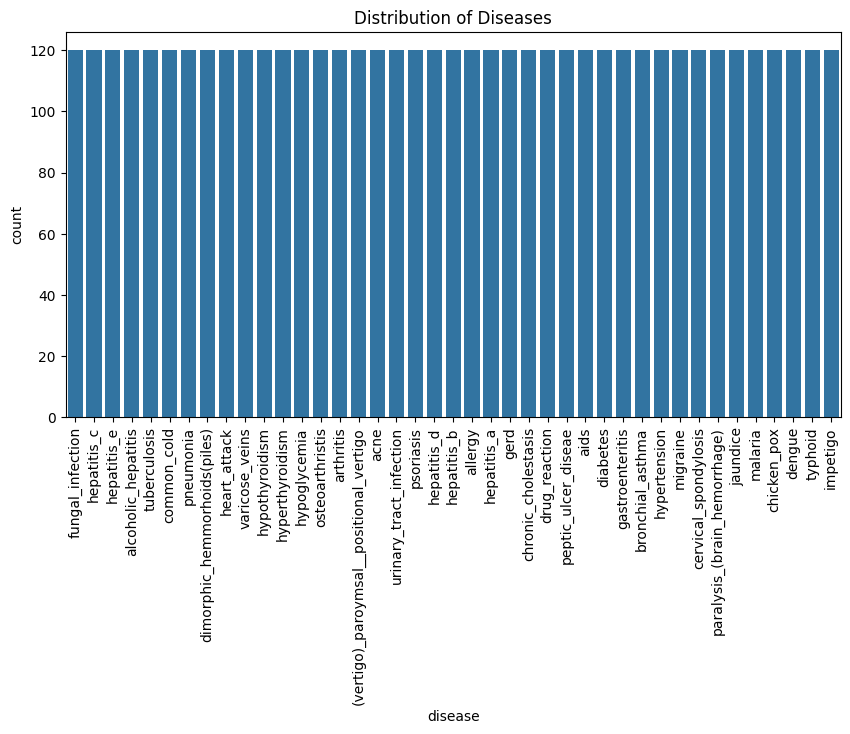

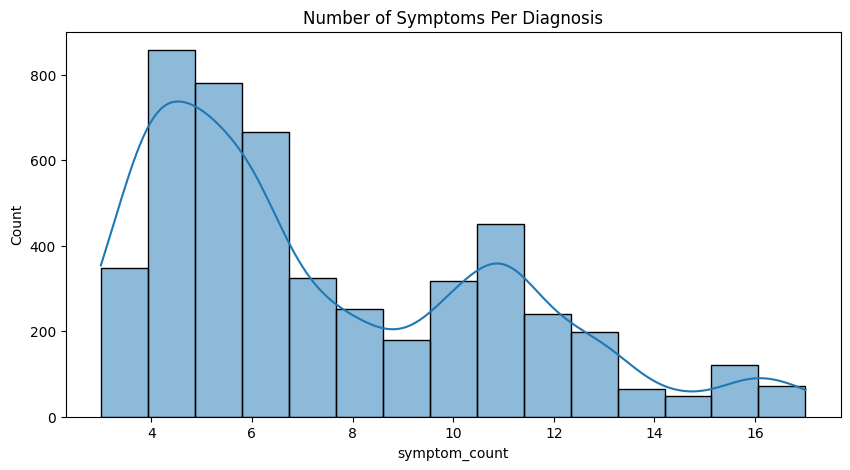

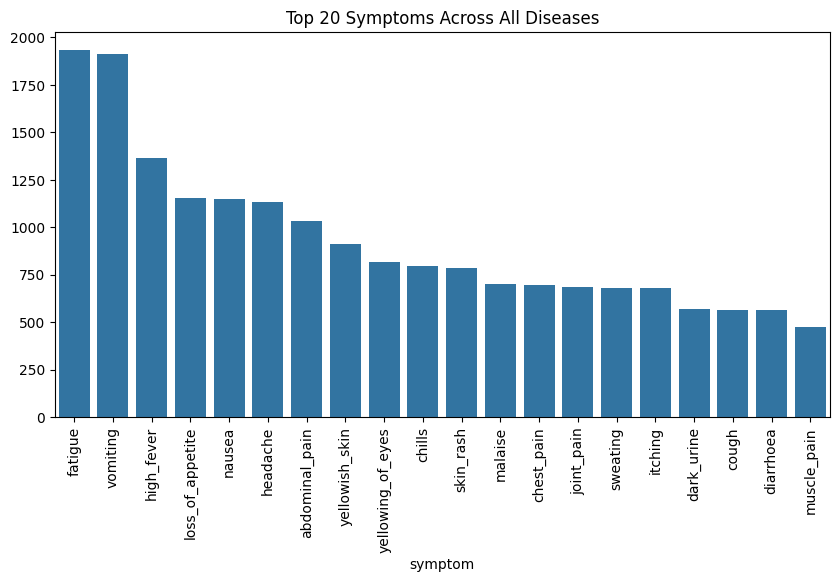

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='disease', order=df['disease'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Diseases')
plt.show()

df['symptom_count'] = df.iloc[:, 1:].notnull().sum(axis=1)
plt.figure(figsize=(10, 5))
sns.histplot(df['symptom_count'], bins=15, kde=True)
plt.title('Number of Symptoms Per Diagnosis')
plt.show()

symptoms_cols = [col for col in df.columns if 'symptom' in col and col != 'symptom_count']
symptom_counts = df[symptoms_cols].melt(var_name='symptom_column', value_name='symptom').dropna()['symptom'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=symptom_counts.index[:20], y=symptom_counts.values[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Symptoms Across All Diseases')
plt.show()

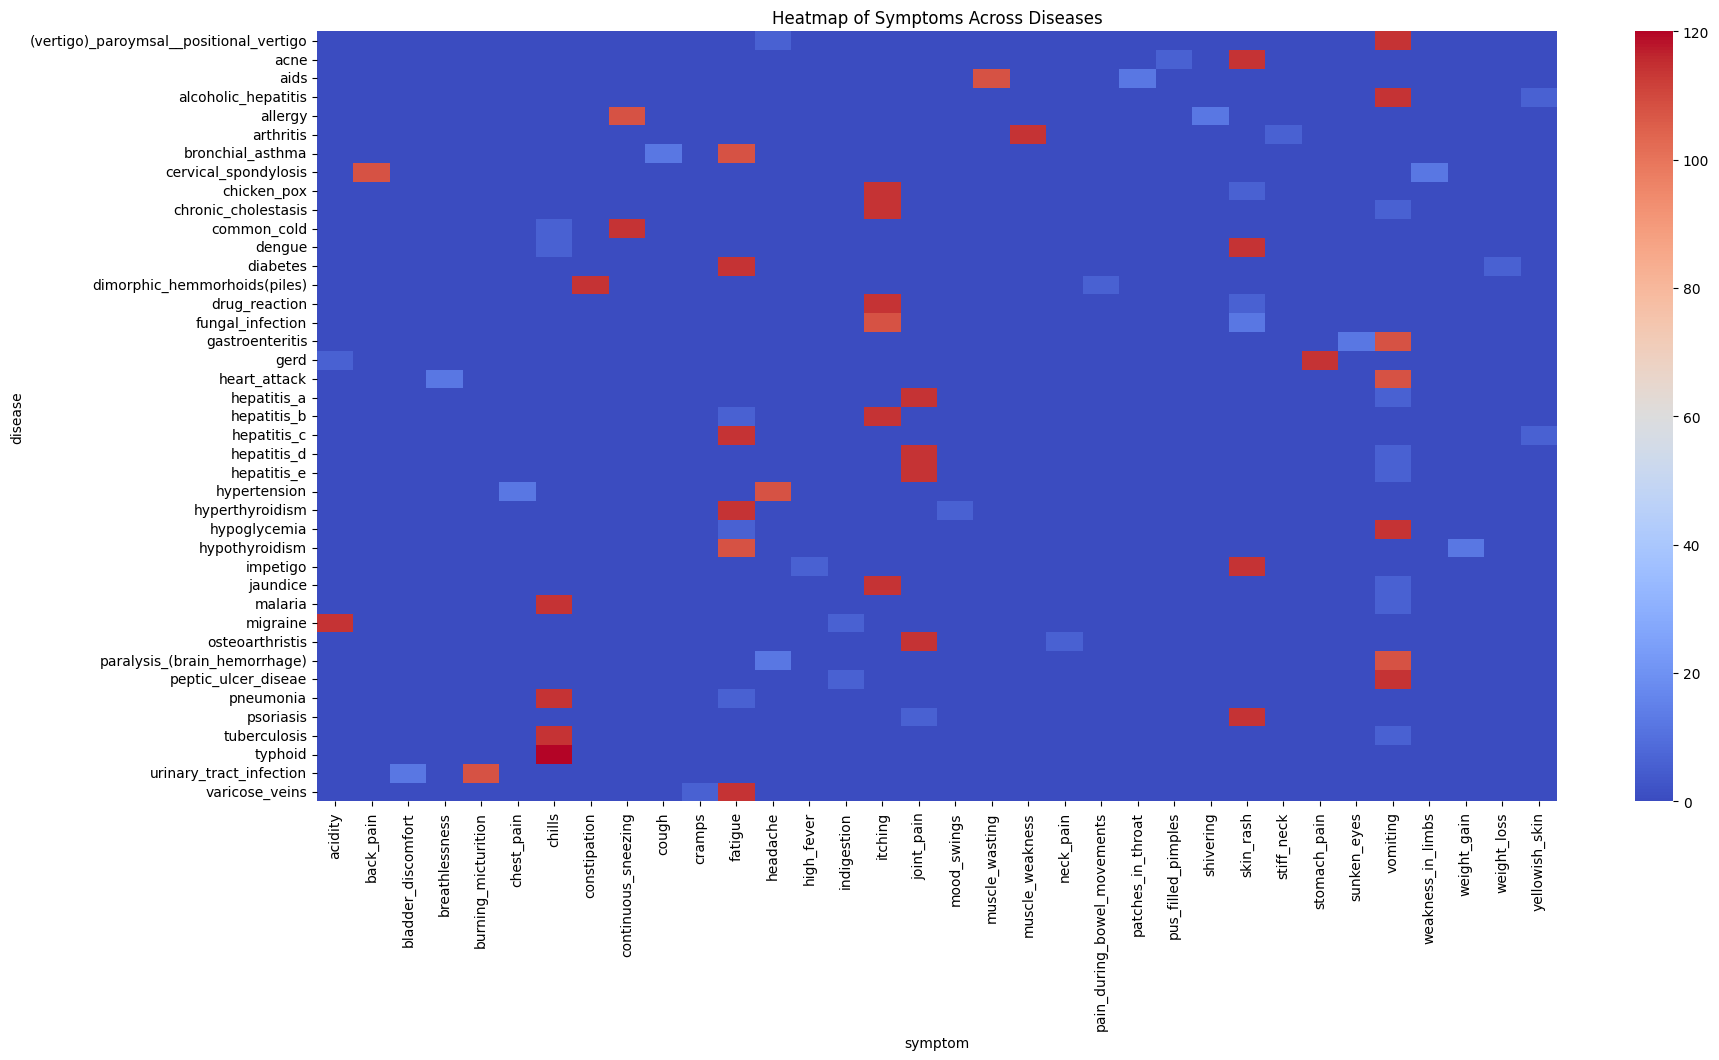

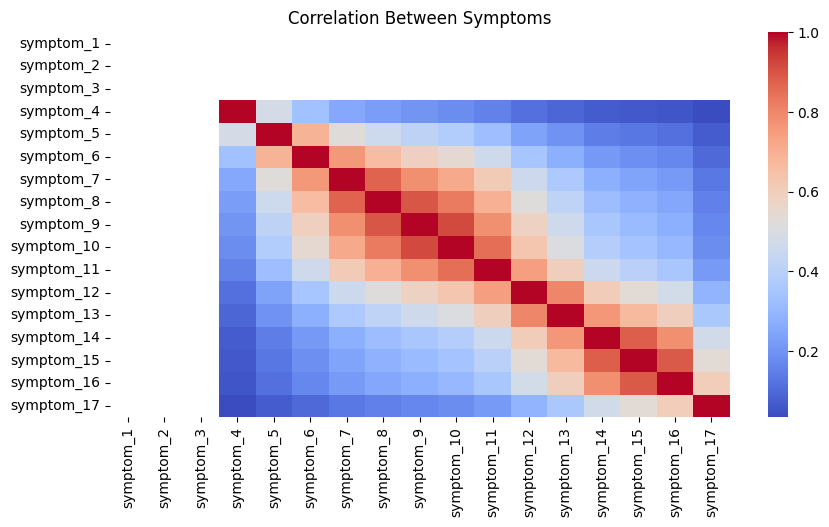

In [9]:
symptom_matrix = pd.crosstab(df['disease'], df[symptoms_cols].melt(value_name='symptom')['symptom']).fillna(0)
plt.figure(figsize=(20, 10))
sns.heatmap(symptom_matrix, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Symptoms Across Diseases')
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df[symptoms_cols].notnull().astype(int).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Between Symptoms')
plt.show()

In [10]:
df_model = df.copy()

df_model = df.drop('symptom_count', axis=1)

df_model.head()

,disease,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,symptom_9,symptom_10,symptom_11,symptom_12,symptom_13,symptom_14,symptom_15,symptom_16,symptom_17
0,fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fungal_infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fungal_infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fungal_infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pre-Processing Model

In [11]:
total_symptoms = len(df_model.columns) - 1
weights = np.linspace(1, 0.05, total_symptoms)

In [12]:
unique_symptoms = set()

for col in df_model.columns[1:]:
    unique_symptoms.update(df_model[col].dropna().unique())
    
unique_symptoms = sorted(unique_symptoms)

df_model_weighted = pd.DataFrame(columns=['disease'] + unique_symptoms)

In [13]:
df_model_weighted

,disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin


In [14]:
for _, row in df_model.iterrows():
    weighted_row = {symptom: 0 for symptom in unique_symptoms}
    
    for i, col in enumerate(df_model.columns[1:]):
        symptom = row[col]
        if pd.notna(symptom):
            weighted_row[symptom] = weights[i]
            
    weighted_row['disease'] = row['disease']
    
    df_model_weighted = pd.concat([df_model_weighted, pd.DataFrame([weighted_row])], ignore_index=True)      
     

C:\Users\Luthfi Hanif\AppData\Local\Temp\ipykernel_21252\3197955687.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_model_weighted = pd.concat([df_model_weighted, pd.DataFrame([weighted_row])], ignore_index=True)


In [15]:
df_model_weighted.fillna(0, inplace=True)

In [16]:
disease_mapping = {disease: i for i, disease in enumerate(df_model_weighted['disease'].unique())}

df_model_weighted['disease_encoded'] = df_model_weighted['disease'].map(disease_mapping)

C:\Users\Luthfi Hanif\AppData\Local\Temp\ipykernel_21252\2749254016.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_model_weighted['disease_encoded'] = df_model_weighted['disease'].map(disease_mapping)


In [17]:
df_model_weighted.head(20)

,disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,disease_encoded
0,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,fungal_infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
print("Shape of weighted dataset:", df_model_weighted.shape)

Shape of weighted dataset: (4920, 133)


In [19]:
# Example of row contents
row_99 = df_model_weighted.iloc[99]

non_null_data = row_99[row_99 != 0].dropna()
   
non_null_data

disease            bronchial_asthma
breathlessness              0.88125
family_history             0.821875
fatigue                         1.0
high_fever                 0.940625
mucoid_sputum                0.7625
disease_encoded                   9
Name: 99, dtype: object

In [20]:
X = df_model_weighted.drop(columns=['disease', 'disease_encoded'])
y = df_model_weighted['disease_encoded']

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [22]:
input_dim = X_train.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(disease_mapping), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Luthfi Hanif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2373 - loss: 3.3930 - val_accuracy: 0.9702 - val_loss: 1.3930
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8731 - loss: 1.1217 - val_accuracy: 1.0000 - val_loss: 0.1128
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9689 - loss: 0.2554 - val_accuracy: 1.0000 - val_loss: 0.0287
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9838 - loss: 0.1288 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9896 - loss: 0.0828 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9965 - loss: 0.0531 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9934 - loss: 0.0385 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9962 - loss: 0.0325 - val_accuracy: 1.

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.9955e-06
Test Accuracy: 1.00


In [25]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_labels, target_names=disease_mapping.keys()))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                                         precision    recall  f1-score   support

                       fungal_infection       1.00      1.00      1.00        18
                                allergy       1.00      1.00      1.00        18
                                   gerd       1.00      1.00      1.00        18
                    chronic_cholestasis       1.00      1.00      1.00        18
                          drug_reaction       1.00      1.00      1.00        18
                    peptic_ulcer_diseae       1.00      1.00      1.00        18
                                   aids       1.00      1.00      1.00        18
                               diabetes       1.00      1.00      1.00        18
                        gastroenteritis       1.00      1.00      1.00        18
                       bronchial_asthma       1.00      1.00      1.00        18
                           hypertension       1.00      1.00      1.

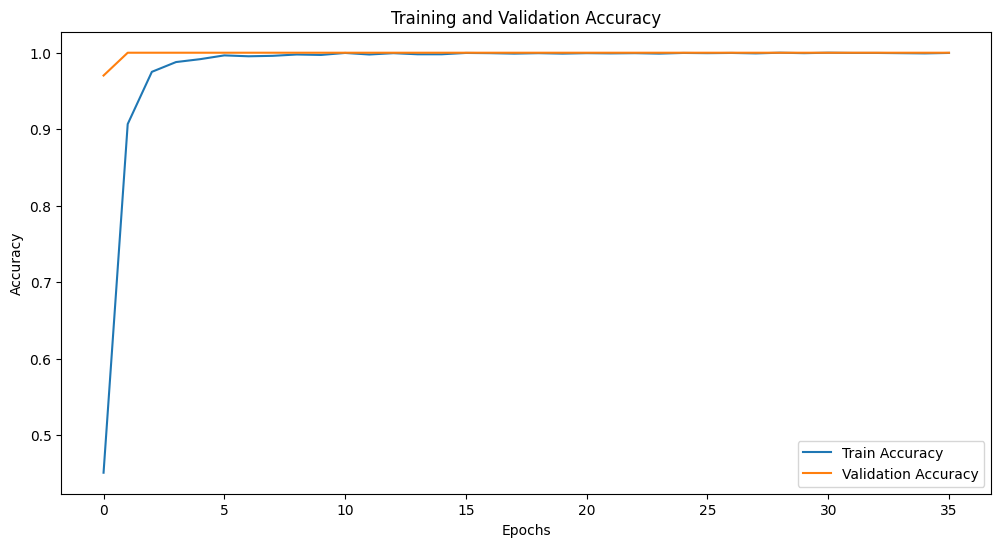

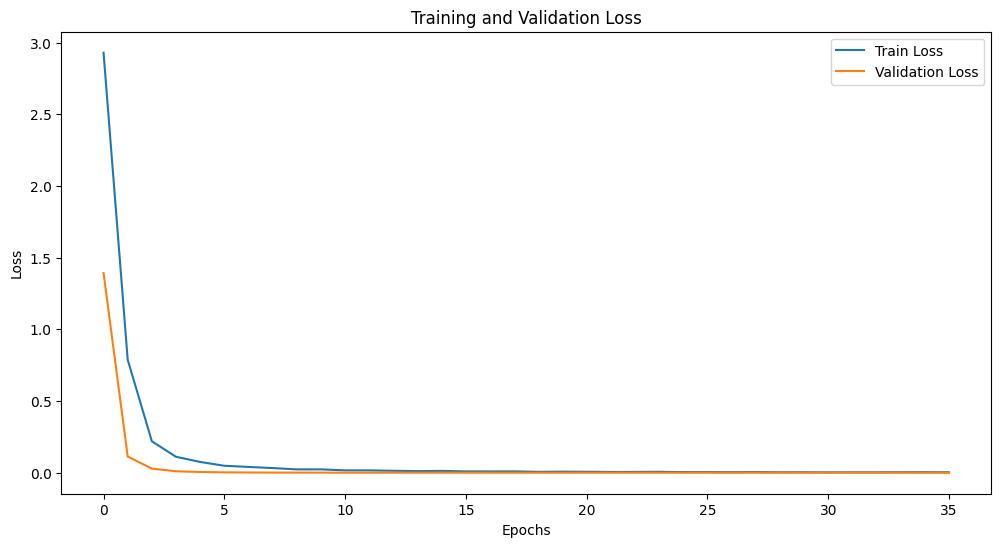

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

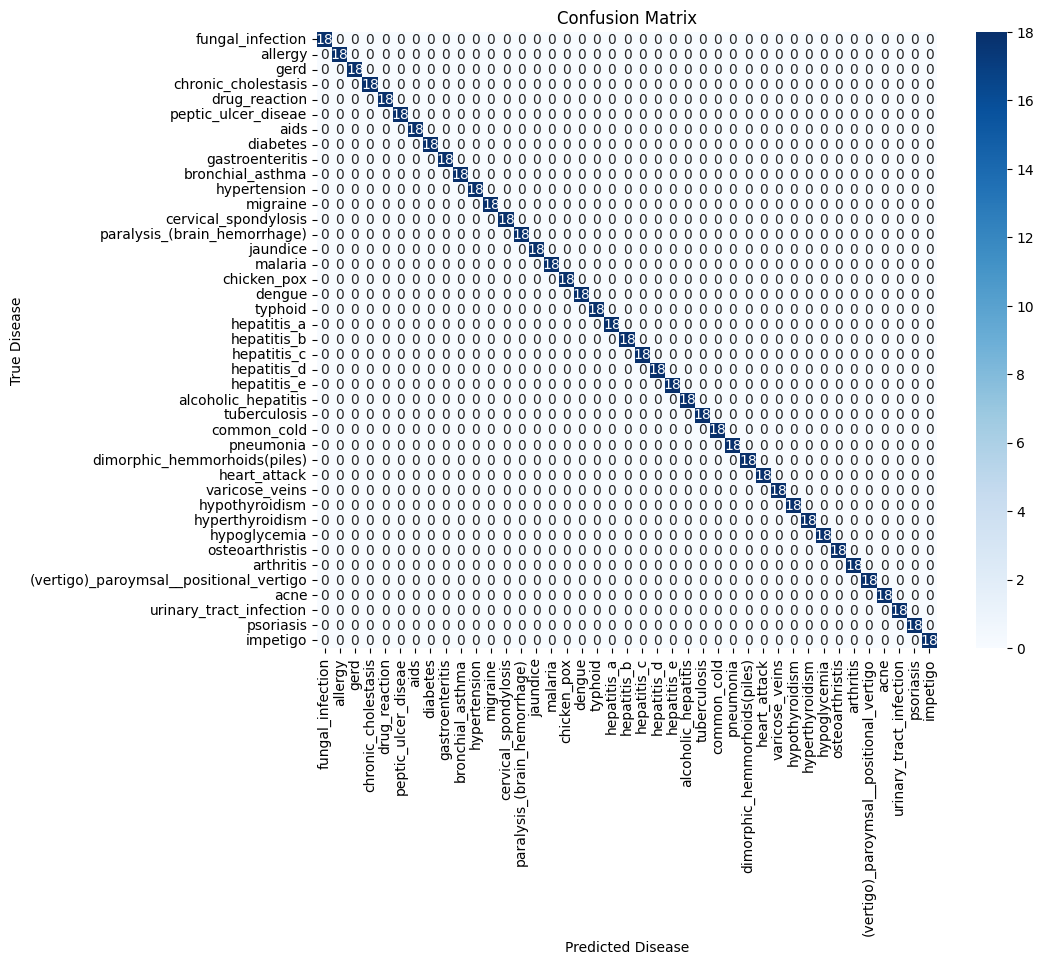

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=disease_mapping.keys(), yticklabels=disease_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Disease')
plt.ylabel('True Disease')
plt.show()

In [28]:
def predict_symptoms(input_symptoms):
    input_data = np.zeros((1, input_dim))
    for i, symptom in enumerate(input_symptoms):
        if symptom in X.columns:
            input_data[0, X.columns.get_loc(symptom)] = weights[i]

    probabilities = model.predict(input_data)[0]
    disease_probs = {disease: prob for disease, prob in zip(disease_mapping.keys(), probabilities)}
    sorted_probs = dict(sorted(disease_probs.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_probs

In [29]:
input_symptoms = ['itching']
predicted_diseases = predict_symptoms(input_symptoms)
print(predicted_diseases)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


{'fungal_infection': 0.43480128, 'chronic_cholestasis': 0.33855343, 'drug_reaction': 0.08720048, 'jaundice': 0.060005806, 'hypertension': 0.021263875, 'chicken_pox': 0.0120594315, 'hepatitis_b': 0.007627252, 'arthritis': 0.006172215, 'migraine': 0.0044037215, 'urinary_tract_infection': 0.0038073664, 'dimorphic_hemmorhoids(piles)': 0.003269626, 'typhoid': 0.0021161842, 'aids': 0.0018289378, 'gastroenteritis': 0.0017519381, 'paralysis_(brain_hemorrhage)': 0.0015921638, 'malaria': 0.0015119397, 'bronchial_asthma': 0.0014631131, '(vertigo)_paroymsal__positional_vertigo': 0.001372491, 'allergy': 0.0011124318, 'cervical_spondylosis': 0.0009978678, 'diabetes': 0.00097086316, 'hypothyroidism': 0.00073716557, 'gerd': 0.00071361504, 'alcoholic_hepatitis': 0.00068115647, 'impetigo': 0.0005643506, 'acne': 0.0005234563, 'pneumonia': 0.00031011587, 'hepatitis_e': 0.00028838505, 'hepatitis_c': 0.0002770452, 'osteoarthristis': 0.0002709654, 'hypoglycemia': 0.00025983356, 'varicose_veins': 0.0002559338